In [ ]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv('gdrive/ My Drive/Colab Notebooks/Data Science/diamond_prices.csv',index_col=0)

In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.shape

(53940, 10)

In [ ]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [ ]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

We can see "table" values as integer from sample data so we might change datatype to int lets check before changing

In [ ]:
all(x.is_integer() for x in df.table)

False

it is false so there might be float values in the data which is not shown in sample

In [ ]:
df.sample(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
49210,0.55,Ideal,E,VS1,61.7,55.0,2079,5.29,5.27,3.26
52604,0.71,Ideal,G,VS2,62.5,56.0,2543,5.67,5.72,3.56
17711,0.41,Ideal,J,VS2,62.4,55.0,613,4.75,4.77,2.97
23567,1.75,Ideal,G,SI2,61.6,54.8,11576,7.73,7.78,4.78
30947,0.32,Ideal,G,SI1,61.8,55.0,449,4.40,4.43,2.73
32001,0.28,Very Good,D,VVS2,62.2,52.0,777,4.21,4.25,2.63
11755,1.01,Very Good,F,SI1,62.4,60.0,5078,6.35,6.40,3.98
40716,0.59,Very Good,H,SI2,60.3,56.0,1160,5.43,5.48,3.29
12643,1.01,Premium,H,VS1,61.2,61.0,5294,6.44,6.41,3.93
9061,0.90,Premium,I,IF,62.6,59.0,4516,6.15,6.12,3.84


Here we can see 0.5 values so let the variable be as float

In [ ]:
df['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [ ]:
df['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

combining VVS2, VVS1, IF, I1 to normalize the categories and naming as "OTHER"

In [ ]:
df['clarity']=df['clarity'].replace(['VVS2','VVS1','IF','I1'], 'OTHER')

In [ ]:
df['clarity'].value_counts()

SI1      13065
VS2      12258
OTHER    11252
SI2       9194
VS1       8171
Name: clarity, dtype: int64

In [ ]:
df['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

combining color I and J as combining I and J will have same level of distribution as other categories.

In [ ]:
df.color[df.color == 'J'] = "I"

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
I     8230
D     6775
Name: color, dtype: int64

performing dummy encoding for categorical variables cut, clarity and color

In [ ]:
df = pd.get_dummies(df, columns=['cut', 'clarity', 'color'])

In [ ]:
df.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,clarity_OTHER,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,color_D,color_E,color_F,color_G,color_H,color_I
1,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
2,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
3,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
5,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1


Checking correlation

In [ ]:
df.corr()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,clarity_OTHER,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,color_D,color_E,color_F,color_G,color_H,color_I
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387,0.091844,0.034196,-0.163660,0.116245,0.009568,-0.217829,0.062669,0.267483,-0.063094,-0.038904,-0.112057,-0.139215,-0.060052,-0.029038,0.102465,0.246281
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924,0.280657,0.136114,-0.022778,-0.198306,0.025828,-0.018709,0.040899,0.007202,-0.024169,-0.009459,-0.013566,-0.028713,-0.017741,0.002768,0.026037,0.032850
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929,0.125332,0.175174,-0.549599,0.338072,0.119971,-0.109369,0.051959,0.095344,-0.026858,-0.009655,-0.008921,0.007172,-0.004906,-0.038815,0.011574,0.038039
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249,0.018728,-0.000312,-0.097175,0.095706,0.006593,-0.118475,0.008957,0.128420,-0.009886,-0.001062,-0.072473,-0.101089,-0.024161,0.008556,0.059223,0.131699
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772,0.080644,0.030349,-0.162674,0.126820,0.004569,-0.244736,0.079241,0.270827,-0.059882,-0.035507,-0.106127,-0.134213,-0.048021,-0.024593,0.095896,0.224250
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006,0.068822,0.032187,-0.153158,0.107943,0.016699,-0.236970,0.076097,0.263252,-0.056490,-0.035928,-0.103999,-0.130136,-0.046707,-0.024479,0.093480,0.218818
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000,0.110367,0.045169,-0.158688,0.090019,0.016039,-0.239906,0.081005,0.263192,-0.058513,-0.036314,-0.105216,-0.132210,-0.048803,-0.024582,0.095041,0.222936
cut_Fair,0.091844,0.280657,0.125332,0.018728,0.080644,0.068822,0.110367,1.000000,-0.055482,-0.143078,-0.102801,-0.094236,-0.008272,0.004587,0.055506,-0.022453,-0.027266,-0.012893,-0.019334,0.007763,-0.006171,0.016646,0.014650
cut_Good,0.034196,0.136114,0.175174,-0.000312,0.030349,0.032187,0.045169,-0.055482,1.000000,-0.258018,-0.185385,-0.169940,-0.060998,0.055938,0.041970,-0.017116,-0.021063,0.008909,0.007013,0.006949,-0.024729,-0.009517,0.014426
cut_Ideal,-0.163660,-0.022778,-0.549599,-0.097175,-0.162674,-0.153158,-0.158688,-0.143078,-0.258018,1.000000,-0.478074,-0.438243,0.141170,-0.082865,-0.108242,0.034247,0.015669,0.014521,-0.001105,0.001351,0.034649,-0.021264,-0.031493


by observing keenly we can see that price is correlated with x,y,z and upon looking those 4 variables w.r.t remaining variables it shows almost same correlation

Lets check by analysing each variable and conclude later after linear regression

Performing visualizations

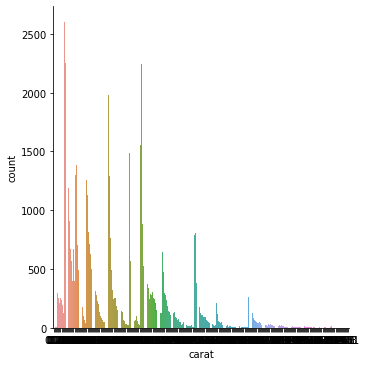

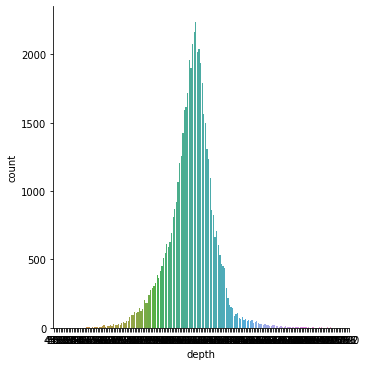

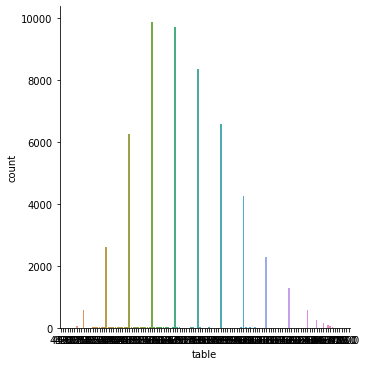

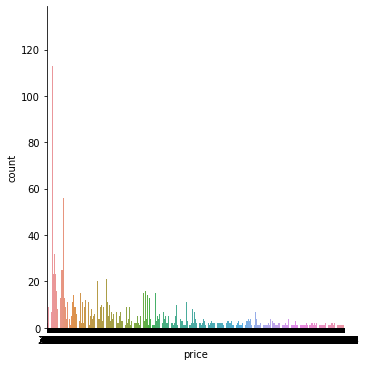

In [ ]:
sns.catplot(x = 'carat', kind = 'count', data = df)
sns.catplot(x = 'depth', kind = 'count', data = df)
sns.catplot(x = 'table', kind = 'count', data = df)
sns.catplot(x = 'price', kind = 'count', data = df) # perfoming only for price because x,y,z,price are related as seen in correlation matrix

From plots we can see depth and table are almost normalized but price and carat are right skewed. So based on price x,y,z are also right skewed

Preparing dataset for modelling splitting target variable and predictors

In [ ]:
X = df.drop('price',1)
X.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,clarity_OTHER,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,color_D,color_E,color_F,color_G,color_H,color_I
1,0.23,61.5,55.0,3.95,3.98,2.43,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
2,0.21,59.8,61.0,3.89,3.84,2.31,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
3,0.23,56.9,65.0,4.05,4.07,2.31,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0.29,62.4,58.0,4.20,4.23,2.63,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
5,0.31,63.3,58.0,4.34,4.35,2.75,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [ ]:
y = df[['price']]
y.head()

,price
1,326
2,326
3,327
4,334
5,335


Splitting Dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

Normalzing

In [ ]:
from sklearn.preprocessing import Normalizer
ns = Normalizer().fit(X_train[['carat', 'x','y','z']])
X_train[['carat', 'x','y','z']] = ns.transform(X_train[['carat', 'x','y','z']])
X_train

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,clarity_OTHER,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,color_D,color_E,color_F,color_G,color_H,color_I
42837,0.055364,62.3,53.0,0.648167,0.644116,0.402404,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0
9728,0.107090,60.5,59.0,0.649235,0.643498,0.391071,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
35975,0.056192,60.6,56.0,0.646211,0.651562,0.393346,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
22502,0.103968,62.5,59.0,0.645801,0.640802,0.401876,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
3572,0.077899,58.4,60.0,0.649897,0.653236,0.380590,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50058,0.080724,62.8,59.0,0.641177,0.646943,0.404772,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
32512,0.054993,63.9,57.0,0.647538,0.639290,0.411070,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
5193,0.097162,62.7,63.0,0.645964,0.640626,0.403594,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
12173,0.111675,61.7,56.0,0.642603,0.645442,0.397486,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1


In [ ]:
X_test[['carat', 'x','y','z']] = ns.transform(X_test[['carat', 'x','y','z']])
print(X_test)

          carat  depth  table         x  ...  color_F  color_G  color_H  color_I
2715   0.048067   61.7   55.0  0.645270  ...        0        0        1        0
14654  0.114421   62.1   57.0  0.646481  ...        0        0        0        1
52761  0.072669   61.0   57.0  0.645813  ...        0        0        0        0
48659  0.049439   63.1   56.0  0.641253  ...        0        0        1        0
14813  0.113328   62.5   55.0  0.639360  ...        0        0        0        0
...         ...    ...    ...       ...  ...      ...      ...      ...      ...
49569  0.075380   57.5   60.1  0.650293  ...        0        1        0        0
32164  0.043220   62.6   53.0  0.645208  ...        1        0        0        0
52460  0.081202   66.4   53.0  0.639175  ...        1        0        0        0
15266  0.112513   61.0   58.0  0.648824  ...        0        0        1        0
43029  0.074237   62.0   57.0  0.644566  ...        0        0        0        1

[10788 rows x 22 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[['carat','depth','table', 'x','y','z']] = sc.fit_transform(X_train[['carat','depth','table', 'x','y','z']])
print(X_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


          carat     depth     table  ...  color_G  color_H  color_I
42837 -0.810479  0.386083 -1.991090  ...        0        0        0
9728   0.686050 -0.870973  0.689861  ...        0        0        0
35975 -0.786525 -0.801137 -0.650615  ...        0        0        0
22502  0.595714  0.525756  0.689861  ...        0        0        0
3572  -0.158519 -2.337539  1.136686  ...        0        0        0
...         ...       ...       ...  ...      ...      ...      ...
50058 -0.076783  0.735265  0.689861  ...        0        0        1
32512 -0.821231  1.503467 -0.203789  ...        0        0        0
5193   0.398794  0.665429  2.477162  ...        1        0        0
12173  0.818685 -0.032936 -0.650615  ...        0        0        1
33004 -1.053289 -0.591627 -0.650615  ...        0        0        0

[43152 rows x 22 columns]


In [ ]:
X_test[['carat','depth','table', 'x','y','z']] = sc.fit_transform(X_test[['carat','depth','table', 'x','y','z']])
print(X_test)

          carat     depth     table  ...  color_G  color_H  color_I
2715  -1.063005 -0.040673 -1.108702  ...        0        1        0
14654  0.913325  0.238007 -0.207899  ...        0        0        1
52761 -0.330269 -0.528364 -0.207899  ...        0        0        0
48659 -1.022154  0.934709 -0.658301  ...        0        1        0
14813  0.880761  0.516688 -1.108702  ...        0        0        0
...         ...       ...       ...  ...      ...      ...      ...
49569 -0.249510 -2.966819  1.188345  ...        1        0        0
32164 -1.207395  0.586358 -2.009505  ...        0        0        0
52460 -0.076106  3.233824 -2.009505  ...        0        0        0
15266  0.856475 -0.528364  0.242502  ...        0        1        0
43029 -0.283556  0.168337 -0.207899  ...        0        0        1

[10788 rows x 22 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


Converting variables to numpy array

In [ ]:
X_train = X_train.iloc[:, :].values
X_test = X_test.iloc[:,:].values
y_test = y_test.iloc[:,:].values
y_train = y_train.iloc[:,:].values

Data is ready for modelling, performing linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
linear_reg.coef_


array([[ 4601.94810285,  -166.95273992,  -100.78209207,   396.42529928,
          949.15682915,   548.18636776,  -900.82863264,   -54.30936003,
          371.54121709,   401.62078881,   181.97598677,   840.3629149 ,
         -424.86958327, -1167.3500777 ,   528.22983827,   223.62690779,
          538.64717162,   346.09646789,   230.85737886,   102.83311337,
         -310.31272641,  -908.12140533]])

In [ ]:
print(linear_reg.intercept_)

[3658.85326383]


In [ ]:
#checking regression score
linear_reg.score(X_test,y_test)

0.8580222784452634

In [ ]:
y_pred = linear_reg.predict(X_test)

Comparing test and pred

In [ ]:
df = pd.DataFrame({'X':list(X_test),'Actual': y_test.ravel(),'Predicted':y_pred.ravel()})

In [ ]:
df.sample(3)

,X,Actual,Predicted
8732,"[-1.0414470286155455, -0.24968365042906882, -0...",974,825.026382
172,"[2.9323418149438045, -2.2701179115649155, 0.69...",18252,14862.874281
7092,"[-0.13205272961416967, 0.7256984066709946, 0.2...",2429,3214.344183


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8580222784452632